In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


In [2]:
data = pd.read_csv('FIFA 2018 Statistics.csv')
data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [3]:
df = data.copy()

In [4]:
df.shape

(128, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    128 non-null    object 
 1   Team                    128 non-null    object 
 2   Opponent                128 non-null    object 
 3   Goal Scored             128 non-null    int64  
 4   Ball Possession %       128 non-null    int64  
 5   Attempts                128 non-null    int64  
 6   On-Target               128 non-null    int64  
 7   Off-Target              128 non-null    int64  
 8   Blocked                 128 non-null    int64  
 9   Corners                 128 non-null    int64  
 10  Offsides                128 non-null    int64  
 11  Free Kicks              128 non-null    int64  
 12  Saves                   128 non-null    int64  
 13  Pass Accuracy %         128 non-null    int64  
 14  Passes                  128 non-null    in

In [6]:
df.describe()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,94.000000,128.000000,12.0,12.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,...,462.648438,106.664062,13.546875,1.695312,0.015625,0.015625,39.457447,0.203125,1.0,45.833333
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,...,151.186311,11.749537,4.619131,1.325454,0.124507,0.124507,24.496506,0.807049,0.0,29.978275
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,...,189.000000,80.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,12.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,...,351.000000,101.000000,10.000000,1.000000,0.000000,0.000000,18.250000,0.000000,1.0,21.750000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,...,462.000000,104.500000,13.000000,2.000000,0.000000,0.000000,39.000000,0.000000,1.0,35.000000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,...,555.250000,109.000000,16.000000,2.000000,0.000000,0.000000,54.750000,0.000000,1.0,75.750000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,...,1137.000000,148.000000,25.000000,6.000000,1.000000,1.000000,90.000000,4.000000,1.0,90.000000


# Preprocessing

In [7]:
#drop date feature as it is unique

df.drop(['Date'], axis=1, inplace=True)
df.head()

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,Egypt,Uruguay,0,43,8,3,3,2,0,1,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,Uruguay,Egypt,1,57,14,4,6,4,5,1,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,Morocco,Iran,0,64,13,3,6,4,5,0,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [8]:
df.isnull().sum()

Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                   34
Round                       0
PSO                         0
Goals in PSO                0
Own goals                 116
Own goal Time             116
dtype: int64

### 116/128 values are NAN for own goal and own goal time
### i.e. 90.625 % are NAN values. hence dropping those features

In [9]:
df.drop(['Own goals', 'Own goal Time'], axis = 1, inplace=True)
df.head()

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO
0,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,...,118,22,0,0,0,Yes,12.0,Group Stage,No,0
1,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,...,105,10,0,0,0,No,NaN,Group Stage,No,0
2,Egypt,Uruguay,0,43,8,3,3,2,0,1,...,112,12,2,0,0,No,NaN,Group Stage,No,0
3,Uruguay,Egypt,1,57,14,4,6,4,5,1,...,111,6,0,0,0,Yes,89.0,Group Stage,No,0
4,Morocco,Iran,0,64,13,3,6,4,5,0,...,101,22,1,0,0,No,NaN,Group Stage,No,0


In [10]:
#Filling NAN value for 1st goal with it's mean value
df['1st Goal'] = df['1st Goal'].fillna(df['1st Goal'].mean())

In [11]:
df.isnull().sum()

Team                      0
Opponent                  0
Goal Scored               0
Ball Possession %         0
Attempts                  0
On-Target                 0
Off-Target                0
Blocked                   0
Corners                   0
Offsides                  0
Free Kicks                0
Saves                     0
Pass Accuracy %           0
Passes                    0
Distance Covered (Kms)    0
Fouls Committed           0
Yellow Card               0
Yellow & Red              0
Red                       0
Man of the Match          0
1st Goal                  0
Round                     0
PSO                       0
Goals in PSO              0
dtype: int64

# EDA

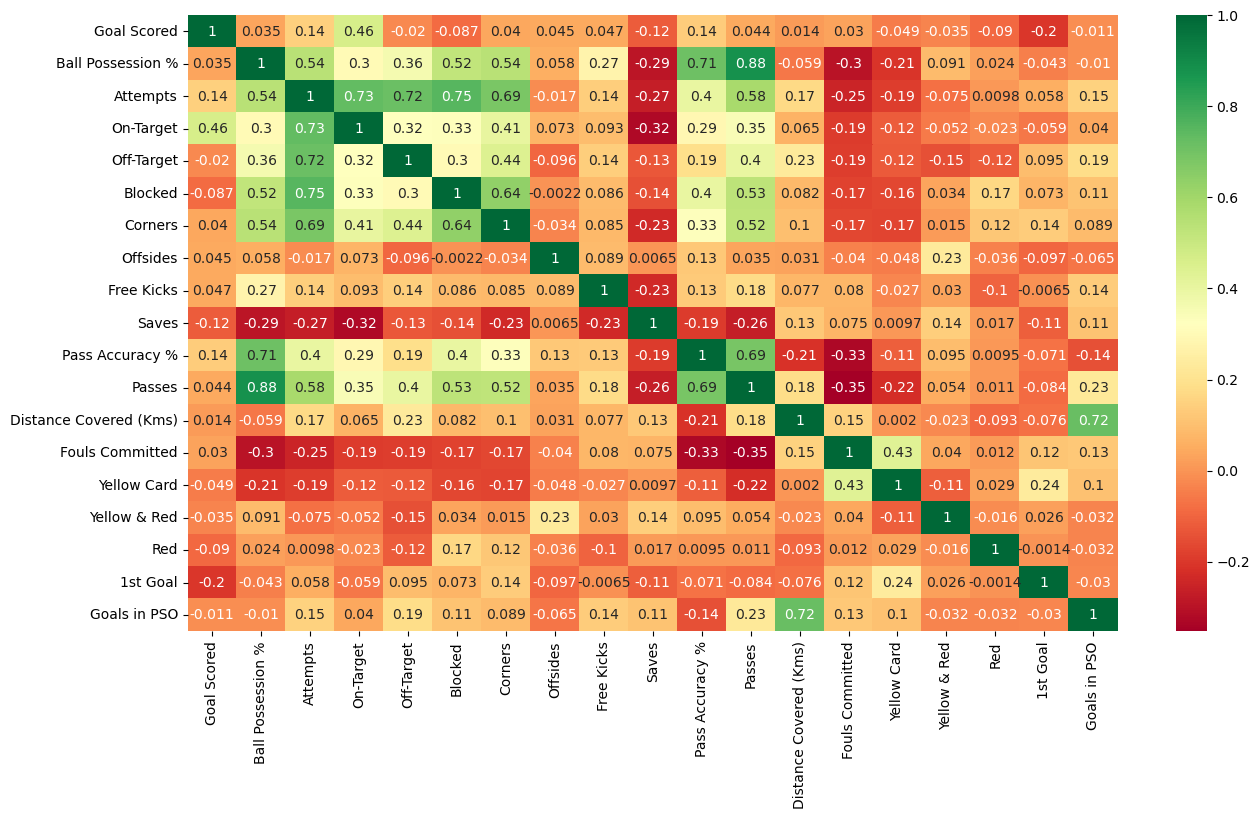

In [12]:
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Team                    128 non-null    object 
 1   Opponent                128 non-null    object 
 2   Goal Scored             128 non-null    int64  
 3   Ball Possession %       128 non-null    int64  
 4   Attempts                128 non-null    int64  
 5   On-Target               128 non-null    int64  
 6   Off-Target              128 non-null    int64  
 7   Blocked                 128 non-null    int64  
 8   Corners                 128 non-null    int64  
 9   Offsides                128 non-null    int64  
 10  Free Kicks              128 non-null    int64  
 11  Saves                   128 non-null    int64  
 12  Pass Accuracy %         128 non-null    int64  
 13  Passes                  128 non-null    int64  
 14  Distance Covered (Kms)  128 non-null    in

In [14]:

print(f"PSO: {df['PSO'].unique()}\n")
print(f"goals in PSO: {df['Goals in PSO'].unique()}\n")

PSO: ['No' 'Yes']

goals in PSO: [0 3 4 2]



In [15]:
pso_map = {
    'No': 0,
    'Yes' : 1
}
df['PSO'] = df['PSO'].map(pso_map)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Team                    128 non-null    object 
 1   Opponent                128 non-null    object 
 2   Goal Scored             128 non-null    int64  
 3   Ball Possession %       128 non-null    int64  
 4   Attempts                128 non-null    int64  
 5   On-Target               128 non-null    int64  
 6   Off-Target              128 non-null    int64  
 7   Blocked                 128 non-null    int64  
 8   Corners                 128 non-null    int64  
 9   Offsides                128 non-null    int64  
 10  Free Kicks              128 non-null    int64  
 11  Saves                   128 non-null    int64  
 12  Pass Accuracy %         128 non-null    int64  
 13  Passes                  128 non-null    int64  
 14  Distance Covered (Kms)  128 non-null    in

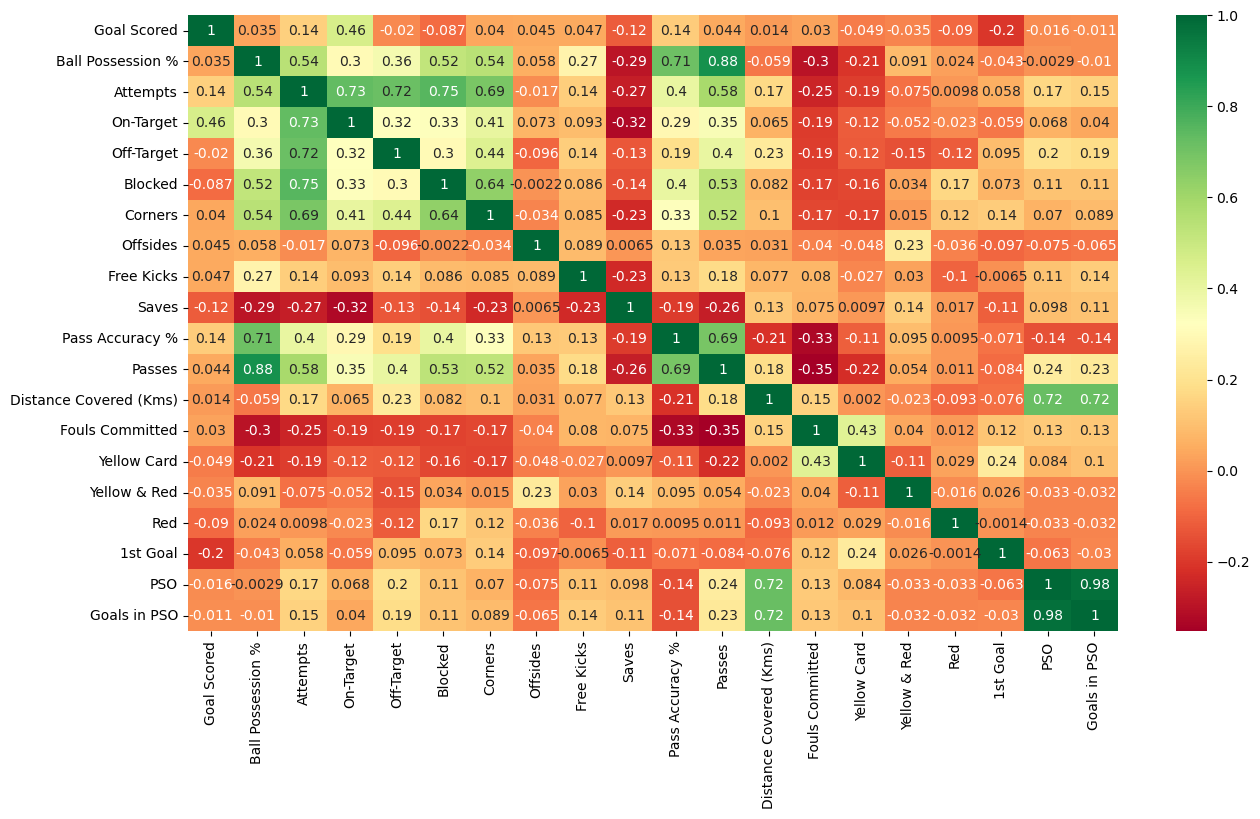

In [17]:
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()


Correlated Features :
1) 'PSO' & 'Goals in PSO' (0.98) : drop = 'PSO' (-4.9e-18 correlated with the O/p feature 'Man of the Match')

2) 'Goals in PSO' & 'Distance Covered (Kms)' (0.72) : drop = 'Distance Covered (Kms)' (0.015 correlated with the O/p feature 'Man of the Match')

3) 'Passes' & 'Ball Possession %' (0.88) : drop = 'Passes' (0.1 correlated with the O/p feature 'Man of the Match')

In [18]:
df.drop(['PSO', 'Distance Covered (Kms)', 'Passes'], axis=1, inplace=True)

In [19]:
df.head()

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Saves,Pass Accuracy %,Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,Goals in PSO
0,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,...,0,78,22,0,0,0,Yes,12.000000,Group Stage,0
1,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,...,2,86,10,0,0,0,No,39.457447,Group Stage,0
2,Egypt,Uruguay,0,43,8,3,3,2,0,1,...,3,78,12,2,0,0,No,39.457447,Group Stage,0
3,Uruguay,Egypt,1,57,14,4,6,4,5,1,...,3,86,6,0,0,0,Yes,89.000000,Group Stage,0
4,Morocco,Iran,0,64,13,3,6,4,5,0,...,2,86,22,1,0,0,No,39.457447,Group Stage,0


# Outliers

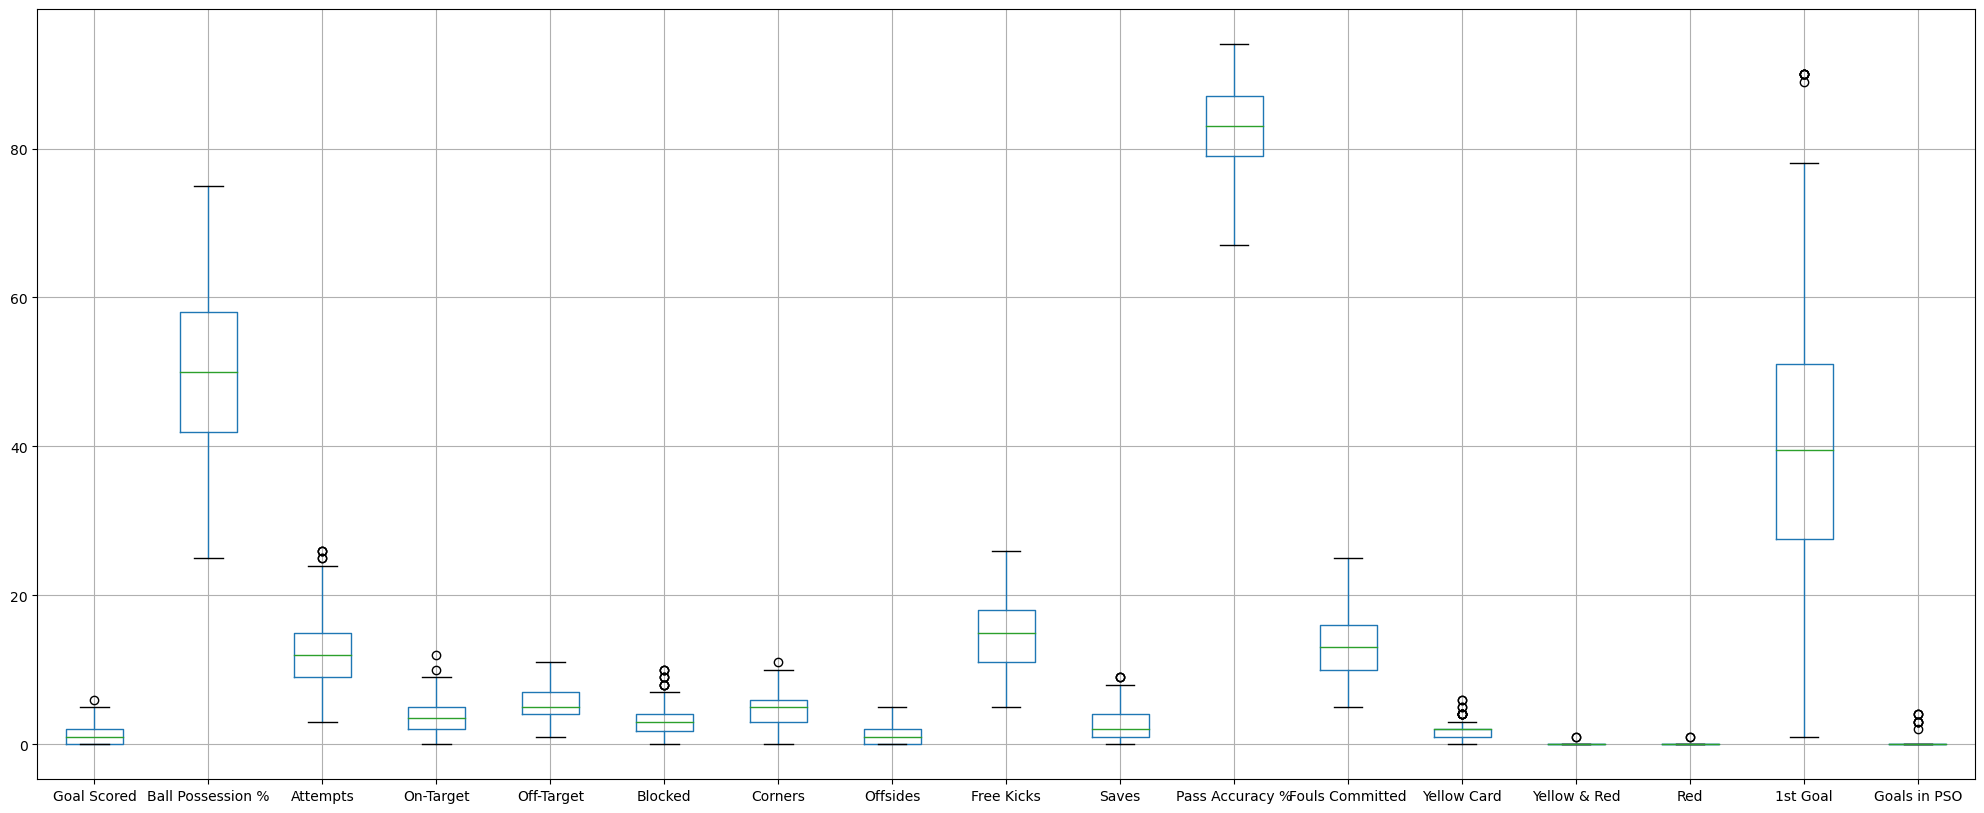

In [20]:
plt.figure(figsize=(25, 10))

df.boxplot()
plt.show()

There are not much outliers in dataset

In [21]:
df.dtypes

Team                  object
Opponent              object
Goal Scored            int64
Ball Possession %      int64
Attempts               int64
On-Target              int64
Off-Target             int64
Blocked                int64
Corners                int64
Offsides               int64
Free Kicks             int64
Saves                  int64
Pass Accuracy %        int64
Fouls Committed        int64
Yellow Card            int64
Yellow & Red           int64
Red                    int64
Man of the Match      object
1st Goal             float64
Round                 object
Goals in PSO           int64
dtype: object

In [22]:
print(f"Team: {df['Team'].unique()}\n")
print(f"Opponent: {df['Opponent'].unique()}\n")
print(f"Man of the Match: {df['Man of the Match'].unique()}\n")
print(f"Round: {df['Round'].unique()}\n")

Team: ['Russia' 'Saudi Arabia' 'Egypt' 'Uruguay' 'Morocco' 'Iran' 'Portugal'
 'Spain' 'France' 'Australia' 'Argentina' 'Iceland' 'Peru' 'Denmark'
 'Croatia' 'Nigeria' 'Costa Rica' 'Serbia' 'Germany' 'Mexico' 'Brazil'
 'Switzerland' 'Sweden' 'Korea Republic' 'Belgium' 'Panama' 'Tunisia'
 'England' 'Colombia' 'Japan' 'Poland' 'Senegal']

Opponent: ['Saudi Arabia' 'Russia' 'Uruguay' 'Egypt' 'Iran' 'Morocco' 'Spain'
 'Portugal' 'Australia' 'France' 'Iceland' 'Argentina' 'Denmark' 'Peru'
 'Nigeria' 'Croatia' 'Serbia' 'Costa Rica' 'Mexico' 'Germany'
 'Switzerland' 'Brazil' 'Korea Republic' 'Sweden' 'Panama' 'Belgium'
 'England' 'Tunisia' 'Japan' 'Colombia' 'Senegal' 'Poland']

Man of the Match: ['Yes' 'No']

Round: ['Group Stage' 'Round of 16' 'Quarter Finals' 'Semi- Finals' '3rd Place'
 'Final']



Label Encoding :
Due to hierarchy (order) present in the features

In [25]:

label_encoder = LabelEncoder()

df['Man of the Match'] = label_encoder.fit_transform(df['Man of the Match'])
man_mappings = {index: label for index, label in enumerate(label_encoder.classes_)}
print('Man of the Match mapping : \n', man_mappings)

Man of the Match mapping : 
 {0: 'No', 1: 'Yes'}


In [26]:
df.head()

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Saves,Pass Accuracy %,Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,Goals in PSO
0,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,...,0,78,22,0,0,0,1,12.000000,Group Stage,0
1,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,...,2,86,10,0,0,0,0,39.457447,Group Stage,0
2,Egypt,Uruguay,0,43,8,3,3,2,0,1,...,3,78,12,2,0,0,0,39.457447,Group Stage,0
3,Uruguay,Egypt,1,57,14,4,6,4,5,1,...,3,86,6,0,0,0,1,89.000000,Group Stage,0
4,Morocco,Iran,0,64,13,3,6,4,5,0,...,2,86,22,1,0,0,0,39.457447,Group Stage,0


In [28]:

round_values = list(df['Round'].unique())
round_values

['Group Stage',
 'Round of 16',
 'Quarter Finals',
 'Semi- Finals',
 '3rd Place',
 'Final']

In [29]:

round_mappings = {label: index for index, label in enumerate(round_values)}
round_mappings

{'Group Stage': 0,
 'Round of 16': 1,
 'Quarter Finals': 2,
 'Semi- Finals': 3,
 '3rd Place': 4,
 'Final': 5}

In [30]:

df['Round'] = df['Round'].apply(lambda x: round_mappings[x])

In [31]:

df['Round']

0      0
1      0
2      0
3      0
4      0
      ..
123    3
124    4
125    4
126    5
127    5
Name: Round, Length: 128, dtype: int64

OneHotEncoding for the features : 'Team' & 'Opponent'
as there is no order relationship present within these features

In [32]:

df['Team'].unique()

array(['Russia', 'Saudi Arabia', 'Egypt', 'Uruguay', 'Morocco', 'Iran',
       'Portugal', 'Spain', 'France', 'Australia', 'Argentina', 'Iceland',
       'Peru', 'Denmark', 'Croatia', 'Nigeria', 'Costa Rica', 'Serbia',
       'Germany', 'Mexico', 'Brazil', 'Switzerland', 'Sweden',
       'Korea Republic', 'Belgium', 'Panama', 'Tunisia', 'England',
       'Colombia', 'Japan', 'Poland', 'Senegal'], dtype=object)

In [33]:

df['Opponent'].unique()

array(['Saudi Arabia', 'Russia', 'Uruguay', 'Egypt', 'Iran', 'Morocco',
       'Spain', 'Portugal', 'Australia', 'France', 'Iceland', 'Argentina',
       'Denmark', 'Peru', 'Nigeria', 'Croatia', 'Serbia', 'Costa Rica',
       'Mexico', 'Germany', 'Switzerland', 'Brazil', 'Korea Republic',
       'Sweden', 'Panama', 'Belgium', 'England', 'Tunisia', 'Japan',
       'Colombia', 'Senegal', 'Poland'], dtype=object)

In [34]:

pd.get_dummies(df['Team'])

,Argentina,Australia,Belgium,Brazil,Colombia,Costa Rica,Croatia,Denmark,Egypt,England,...,Portugal,Russia,Saudi Arabia,Senegal,Serbia,Spain,Sweden,Switzerland,Tunisia,Uruguay
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
124,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:

# Differentiating from the 'Team' variable

pd.get_dummies(df['Opponent'].apply(lambda x: "opp_" + x))

,opp_Argentina,opp_Australia,opp_Belgium,opp_Brazil,opp_Colombia,opp_Costa Rica,opp_Croatia,opp_Denmark,opp_Egypt,opp_England,...,opp_Portugal,opp_Russia,opp_Saudi Arabia,opp_Senegal,opp_Serbia,opp_Spain,opp_Sweden,opp_Switzerland,opp_Tunisia,opp_Uruguay
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
125,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:

df['Opponent'] = df['Opponent'].apply(lambda x: "opp_" + x)

In [37]:
df

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Saves,Pass Accuracy %,Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,Goals in PSO
0,Russia,opp_Saudi Arabia,5,40,13,7,3,3,6,3,...,0,78,22,0,0,0,1,12.000000,0,0
1,Saudi Arabia,opp_Russia,0,60,6,0,3,3,2,1,...,2,86,10,0,0,0,0,39.457447,0,0
2,Egypt,opp_Uruguay,0,43,8,3,3,2,0,1,...,3,78,12,2,0,0,0,39.457447,0,0
3,Uruguay,opp_Egypt,1,57,14,4,6,4,5,1,...,3,86,6,0,0,0,1,89.000000,0,0
4,Morocco,opp_Iran,0,64,13,3,6,4,5,0,...,2,86,22,1,0,0,0,39.457447,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,England,opp_Croatia,1,46,11,1,6,4,4,3,...,5,79,14,1,0,0,0,5.000000,3,0
124,Belgium,opp_England,2,43,12,4,3,5,4,1,...,5,88,11,1,0,0,1,4.000000,4,0
125,England,opp_Belgium,0,57,15,5,7,3,5,0,...,2,92,5,2,0,0,0,39.457447,4,0
126,France,opp_Croatia,4,39,8,6,1,1,2,1,...,1,75,14,2,0,0,1,18.000000,5,0


In [38]:

# Concatenating the encoded 'Team' & 'Opponent' variables to the dataset

data_concat = pd.concat([df, pd.get_dummies(df['Team']), pd.get_dummies(df['Opponent'])], axis=1)

In [39]:

# Dropping the original 'Team' & 'Opponent' variables from the dataset

data_concat.drop(['Team', 'Opponent'], axis=1, inplace=True)

In [40]:

data_concat.head()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,opp_Portugal,opp_Russia,opp_Saudi Arabia,opp_Senegal,opp_Serbia,opp_Spain,opp_Sweden,opp_Switzerland,opp_Tunisia,opp_Uruguay
0,5,40,13,7,3,3,6,3,11,0,...,0,0,1,0,0,0,0,0,0,0
1,0,60,6,0,3,3,2,1,25,2,...,0,1,0,0,0,0,0,0,0,0
2,0,43,8,3,3,2,0,1,7,3,...,0,0,0,0,0,0,0,0,0,1
3,1,57,14,4,6,4,5,1,13,3,...,0,0,0,0,0,0,0,0,0,0
4,0,64,13,3,6,4,5,0,14,2,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Team               128 non-null    object 
 1   Opponent           128 non-null    object 
 2   Goal Scored        128 non-null    int64  
 3   Ball Possession %  128 non-null    int64  
 4   Attempts           128 non-null    int64  
 5   On-Target          128 non-null    int64  
 6   Off-Target         128 non-null    int64  
 7   Blocked            128 non-null    int64  
 8   Corners            128 non-null    int64  
 9   Offsides           128 non-null    int64  
 10  Free Kicks         128 non-null    int64  
 11  Saves              128 non-null    int64  
 12  Pass Accuracy %    128 non-null    int64  
 13  Fouls Committed    128 non-null    int64  
 14  Yellow Card        128 non-null    int64  
 15  Yellow & Red       128 non-null    int64  
 16  Red                128 non

In [44]:
# No text values within the dataset

np.sum(data_concat.dtypes == 'object')

0

Train - Test Split

In [45]:

y = data_concat['Man of the Match']
X = data_concat.drop('Man of the Match', axis=1)

In [46]:

'Man of the Match' in X

False

In [47]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


Feature Scaling : Standardizing

In [48]:

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


# Standardized Training Data
X_train = pd.DataFrame(X_train, columns=X.columns)
X_train.head()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,opp_Portugal,opp_Russia,opp_Saudi Arabia,opp_Senegal,opp_Serbia,opp_Spain,opp_Sweden,opp_Switzerland,opp_Tunisia,opp_Uruguay
0,-0.273851,0.628570,-0.480559,0.075765,-0.098037,-0.999126,-0.778760,1.531222,0.705326,-0.814082,...,-0.15523,-0.222222,0.0,5.228129,-0.191273,-0.191273,-0.222222,-0.222222,-0.15523,-0.191273
1,-1.169134,-0.578853,-0.672332,-0.844243,-0.891667,0.274760,0.963204,-0.276471,-0.837575,-1.330478,...,-0.15523,-0.222222,0.0,-0.191273,-0.191273,-0.191273,-0.222222,-0.222222,-0.15523,-0.191273
2,-1.169134,0.930426,-0.672332,-0.384239,-0.098037,-0.999126,0.092222,-0.276471,-1.719233,0.735104,...,-0.15523,-0.222222,0.0,-0.191273,-0.191273,-0.191273,-0.222222,-0.222222,-0.15523,-0.191273
3,-0.273851,-0.176378,-1.631194,-1.304247,-1.288482,-0.999126,-1.649743,-1.180317,0.264497,0.735104,...,-0.15523,-0.222222,0.0,-0.191273,-0.191273,-0.191273,-0.222222,-0.222222,-0.15523,-0.191273
4,-0.273851,0.226096,0.094758,-1.304247,1.092409,0.274760,-0.343269,-1.180317,-0.837575,-0.814082,...,-0.15523,4.500000,0.0,-0.191273,-0.191273,-0.191273,-0.222222,-0.222222,-0.15523,-0.191273


In [49]:

# Standardized Testing Data
X_test = pd.DataFrame(X_test, columns=X.columns)
X_test.head()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,opp_Portugal,opp_Russia,opp_Saudi Arabia,opp_Senegal,opp_Serbia,opp_Spain,opp_Sweden,opp_Switzerland,opp_Tunisia,opp_Uruguay
0,0.534717,0.945859,0.044363,0.401529,0.314734,-0.555813,0.155787,-1.063810,1.779610,0.896676,...,-0.220863,-0.154303,-0.273861,0.0,0.0,-0.154303,-0.154303,0.0,-0.154303,-0.220863
1,-0.286456,0.046037,-0.527915,0.401529,-0.151941,-1.365981,-0.588530,-0.313911,-2.006695,0.443064,...,-0.220863,-0.154303,-0.273861,0.0,0.0,-0.154303,-0.154303,0.0,-0.154303,-0.220863
2,-0.286456,-0.763802,-0.146397,-0.030115,0.314734,-0.555813,-1.332846,0.435988,-0.811020,2.711127,...,-0.220863,-0.154303,-0.273861,0.0,0.0,-0.154303,-0.154303,0.0,-0.154303,-0.220863
3,0.534717,-0.493856,-0.909433,-0.893401,-0.618616,-0.555813,-0.588530,1.185886,-0.811020,-0.010549,...,-0.220863,-0.154303,-0.273861,0.0,0.0,-0.154303,-0.154303,0.0,-0.154303,-0.220863
4,0.534717,-0.853784,-1.290951,-0.461758,-1.551966,-0.960897,-0.960688,-1.063810,-0.213182,0.443064,...,4.527693,-0.154303,-0.273861,0.0,0.0,-0.154303,-0.154303,0.0,-0.154303,-0.220863



Training

In [50]:

# Using Random Forest Model

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [51]:

rf_score = rf.score(X_test, y_test)
rf_scorescore

0.7674418604651163